In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm


In [247]:
laptops = pd.read_csv('cleaned_laptops_final.csv', encoding='Latin-1')

In [248]:
laptops.head()

,id,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews,link,storage,Studying,Programming,Gaming,Multimedia,Medium,Advanced,image_url,title
0,0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4,DDR4,0,1024,Windows,64-bit,0,ThinNlight,0.0,0,False,No,20554,32790,23,3.7,63,12,https://www.flipkart.com/lenovo-e41-amd-apu-du...,1024,False,False,False,False,False,False,https://rukminim2.flixcart.com/image/416/416/k...,Not Available
1,1,Lenovo,Ideapad,AMD,APU Dual,10th,4,DDR4,0,512,Windows,64-bit,0,Casual,0.0,0,False,No,34990,21325,8,3.6,1894,256,https://www.flipkart.com/lenovo-ideapad-1-amd-...,512,False,False,False,False,False,False,https://rukminim2.flixcart.com/image/416/416/l...,Not Available
2,2,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,64-bit,0,ThinNlight,0.0,0,False,No,21990,27990,28,3.7,1153,159,https://www.flipkart.com/chuwi-intel-celeron-q...,128,False,False,False,False,False,False,https://rukminim2.flixcart.com/image/416/416/x...,Not Available
3,3,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,64-bit,0,ThinNlight,0.0,0,False,No,21990,27990,23,3.7,1153,159,https://www.flipkart.com/chuwi-intel-celeron-q...,128,False,False,False,False,False,False,https://rukminim2.flixcart.com/image/416/416/x...,Not Available
4,4,Avita,PURA,AMD,APU Dual,10th,4,DDR4,256,0,Windows,64-bit,0,ThinNlight,0.0,0,False,No,21990,33490,25,3.7,1657,234,https://www.flipkart.com/chuwi-intel-celeron-q...,256,False,False,False,False,False,False,https://rukminim2.flixcart.com/image/416/416/x...,Not Available


In [249]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               896 non-null    int64  
 1   brand            896 non-null    object 
 2   model            896 non-null    object 
 3   processor_brand  896 non-null    object 
 4   processor_name   896 non-null    object 
 5   processor_gnrtn  896 non-null    object 
 6   ram_gb           896 non-null    int64  
 7   ram_type         896 non-null    object 
 8   ssd              896 non-null    int64  
 9   hdd              896 non-null    int64  
 10  os               896 non-null    object 
 11  os_bit           896 non-null    object 
 12  graphic_card_gb  896 non-null    int64  
 13  weight           896 non-null    object 
 14  display_size     896 non-null    float64
 15  warranty         896 non-null    int64  
 16  Touchscreen      896 non-null    bool   
 17  msoffice        

In [250]:
for column in laptops.columns:
    print(f"{column}: {laptops[column].unique()}")

id: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 24

In [251]:
try:
    laptops["ram_gb"] = laptops["ram_gb"].str.replace(' GB GB', '').astype(int)
except:
    pass

try:
    laptops["ssd"] = laptops["ssd"].str.replace(' GB', '').astype(int)
except:
    pass

try:
    laptops["hdd"] = laptops["hdd"].str.replace(' GB', '').astype(int)
except:
    pass


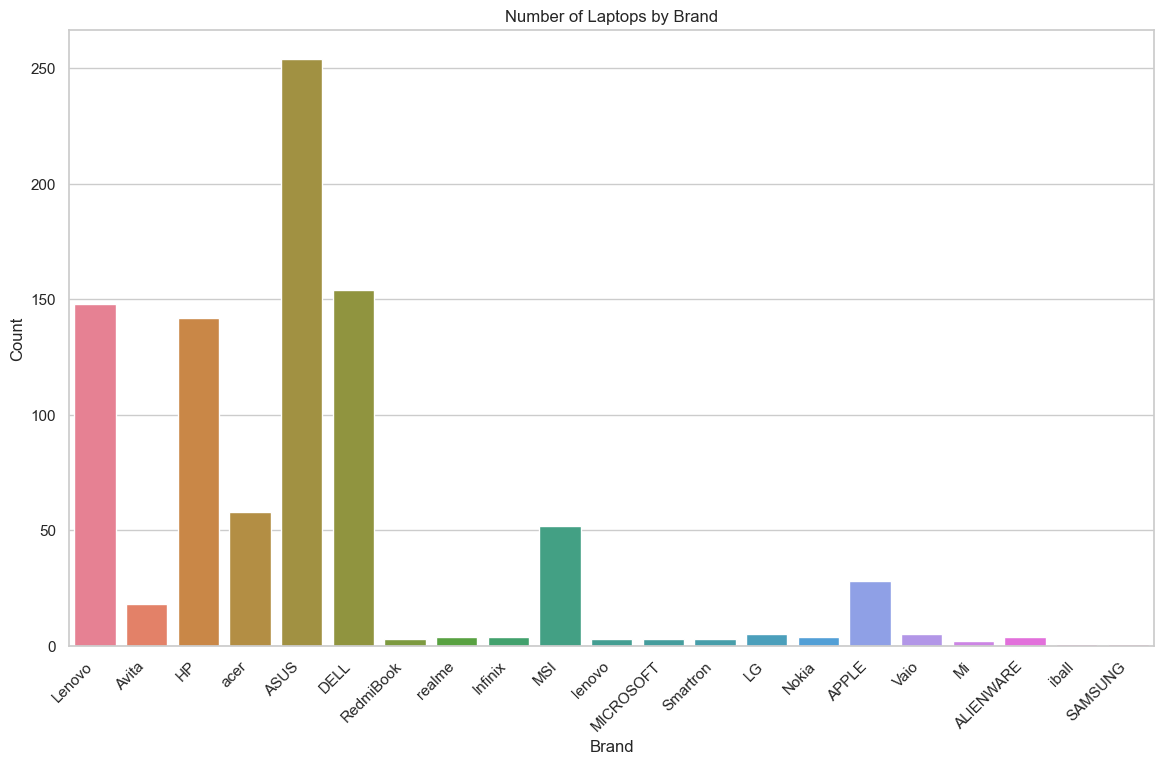

In [252]:
colors = sns.color_palette("husl", n_colors=len(laptops['brand'].unique()))

# Plotting the brand count plot
plt.figure(figsize=(14, 8))
sns.countplot(x='brand', data=laptops, hue='brand', palette=colors, legend=False)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Number of Laptops by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()


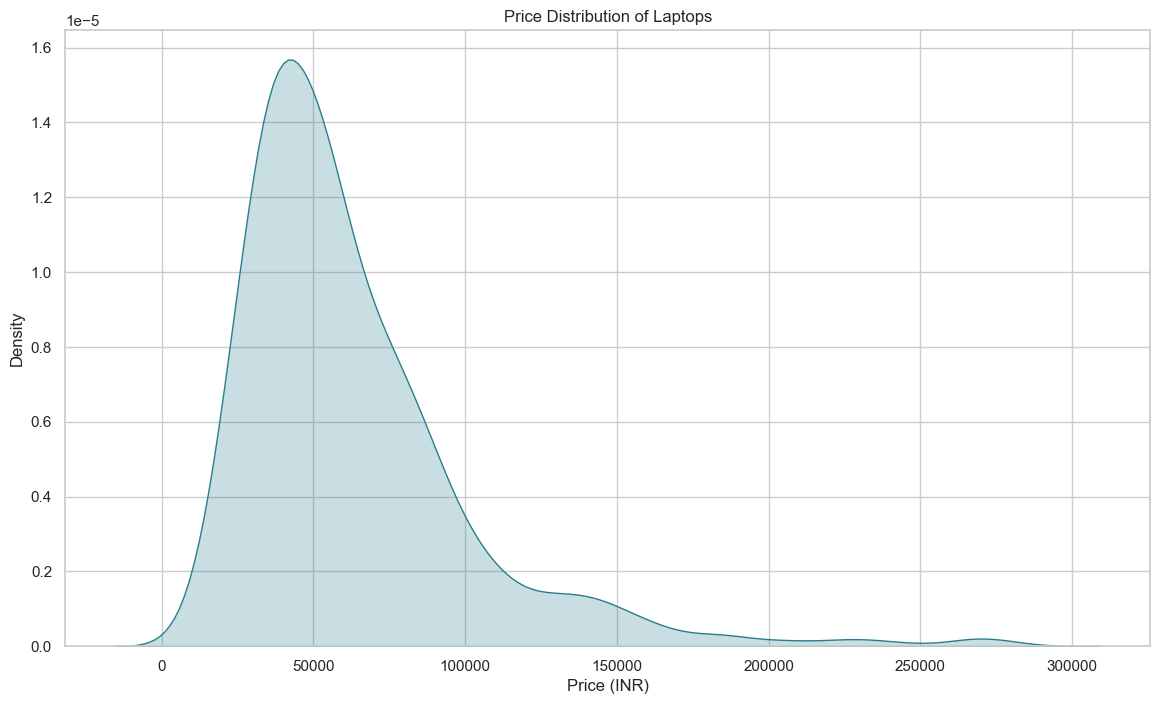

In [253]:

sns.set_style("whitegrid")
colors = sns.color_palette("viridis")

# Plotting the price distribution with a KDE curve
plt.figure(figsize=(14, 8))
sns.kdeplot(laptops['latest_price'], color=colors[2], fill=True)
plt.title('Price Distribution of Laptops')
plt.xlabel('Price (INR)')
plt.ylabel('Density')
plt.show()



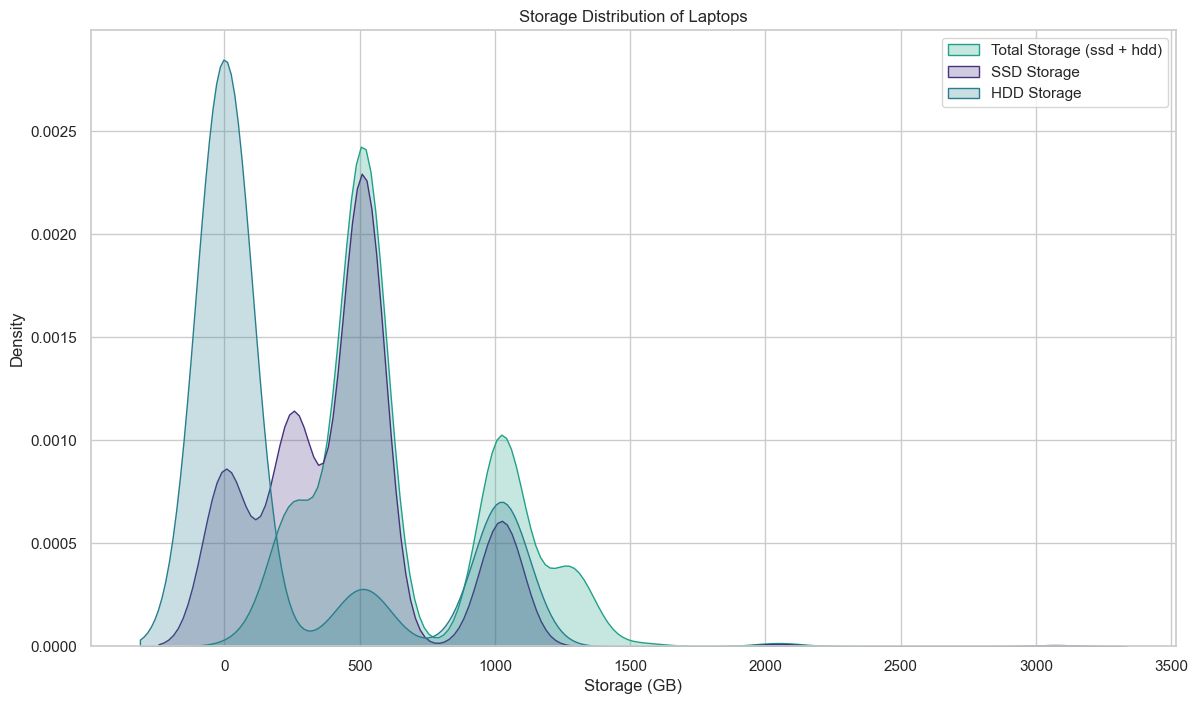

In [254]:
sns.set_style("whitegrid")
colors = sns.color_palette("viridis")

laptops['storage'] = laptops['ssd'] + laptops['hdd']

# Plotting the storage distribution with a KDE curve for both 'ssd' and 'hdd'
plt.figure(figsize=(14, 8))
sns.kdeplot(laptops['storage'], color=colors[3], fill=True, label='Total Storage (ssd + hdd)')
sns.kdeplot(laptops['ssd'], color=colors[0], fill=True, label='SSD Storage')
sns.kdeplot(laptops['hdd'], color=colors[2], fill=True, label='HDD Storage')

plt.title('Storage Distribution of Laptops')
plt.xlabel('Storage (GB)')
plt.ylabel('Density')
plt.legend()
plt.show()



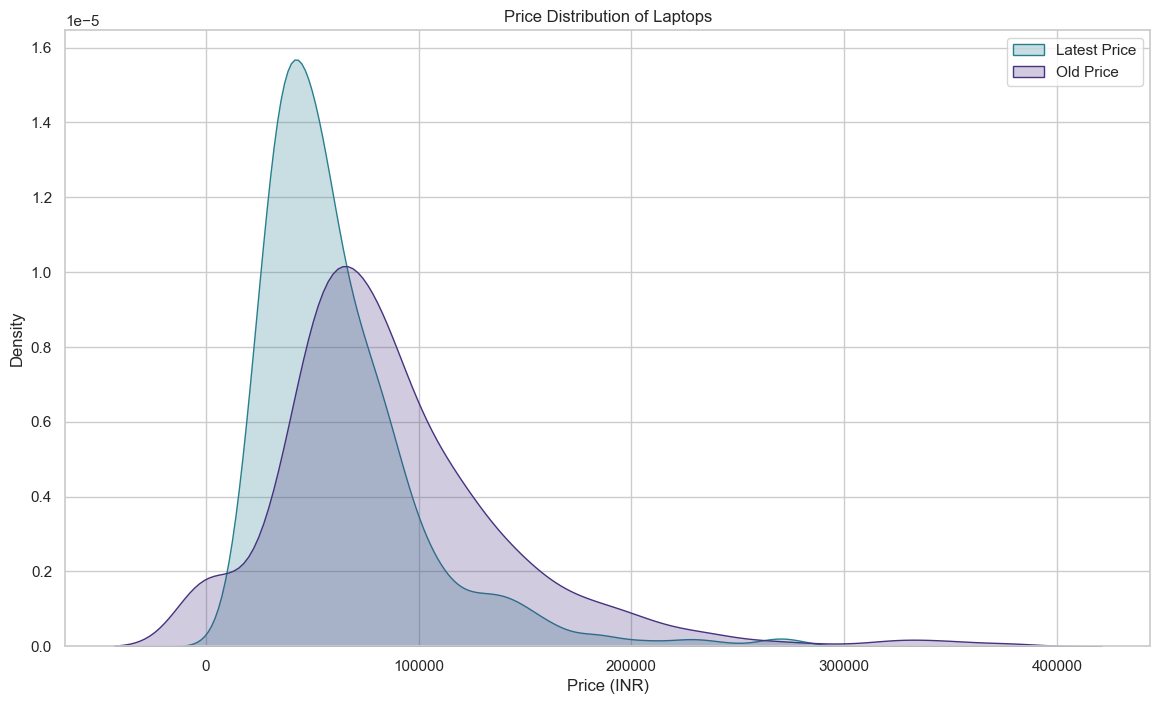

In [255]:
# plot contrast between latest price and old price
sns.set_style("whitegrid")
colors = sns.color_palette("viridis")

# Plotting the price distribution with a KDE curve
plt.figure(figsize=(14, 8))
sns.kdeplot(laptops['latest_price'], color=colors[2], fill=True, label='Latest Price')
sns.kdeplot(laptops['old_price'], color=colors[0], fill=True, label='Old Price')
plt.title('Price Distribution of Laptops')
plt.xlabel('Price (INR)')
plt.ylabel('Density')
plt.legend()
plt.show()


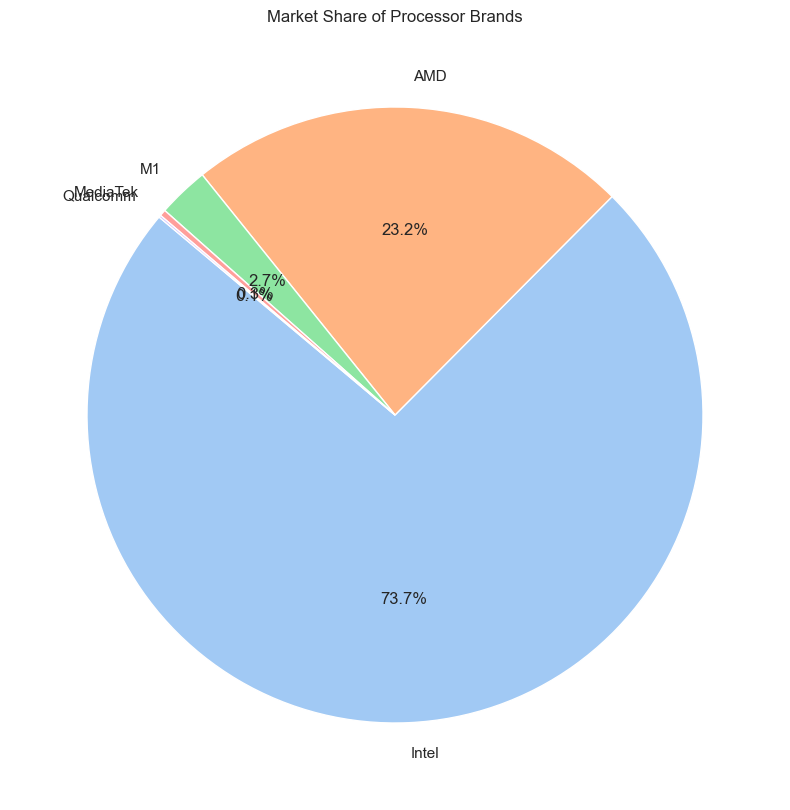

In [256]:

# processor_brand_counts = laptops['processor_brand'].value_counts()

# # Plotting a pie chart
# plt.figure(figsize=(10, 10))
# plt.pie(processor_brand_counts, labels=processor_brand_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
# plt.title('Market Share of Processor Brands')
# plt.show()
import matplotlib.pyplot as plt

# Count the occurrences of each processor brand
processor_brand_counts = laptops['processor_brand'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(processor_brand_counts, labels=processor_brand_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"), labeldistance=1.1)
plt.title('Market Share of Processor Brands')
plt.show()



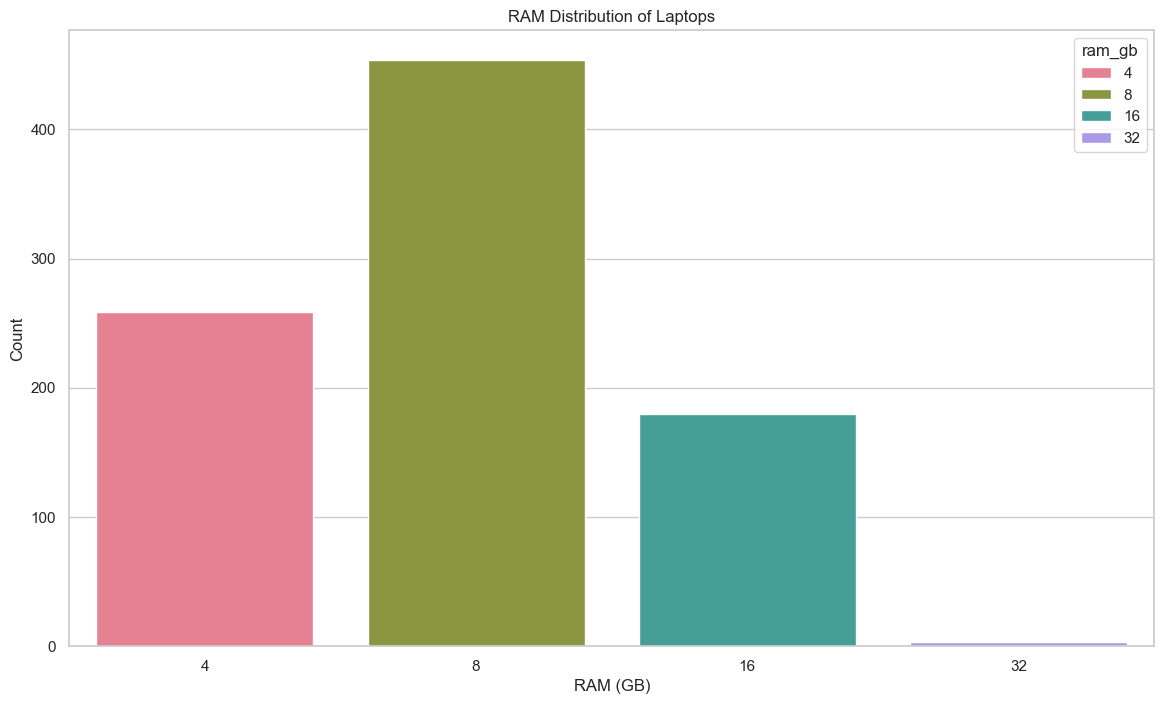

In [257]:

colors = sns.color_palette("husl", n_colors=len(laptops['ram_gb'].unique()))

# Plotting the RAM distribution with a colorful bar graph
plt.figure(figsize=(14, 8))
sns.countplot(x='ram_gb', data=laptops, hue='ram_gb', palette=colors, dodge=False)
plt.title('RAM Distribution of Laptops')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()


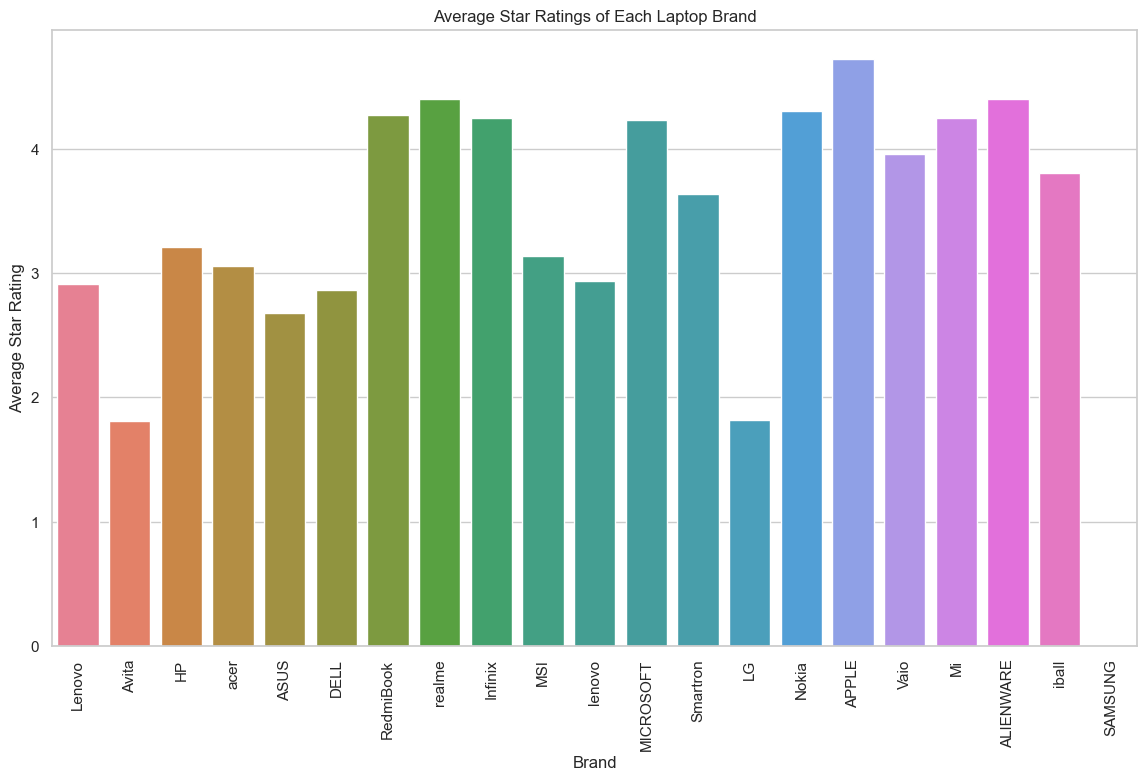

In [258]:

average_rating = {}
for brand in laptops['brand'].unique():
    average_rating[brand] = laptops[laptops['brand'] == brand]['star_rating'].mean()

# Create a DataFrame from the dictionary
average_rating_df = pd.DataFrame(list(average_rating.items()), columns=['brand', 'average_star_rating'])

# Set a colorful palette
colors = sns.color_palette("husl", n_colors=len(average_rating_df['brand']))

# Plotting the average star ratings for each brand
plt.figure(figsize=(14, 8))
sns.barplot(x='brand', y='average_star_rating', data=average_rating_df, palette=colors, hue='brand')
plt.title('Average Star Ratings of Each Laptop Brand')
plt.xlabel('Brand')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=90)
plt.show()




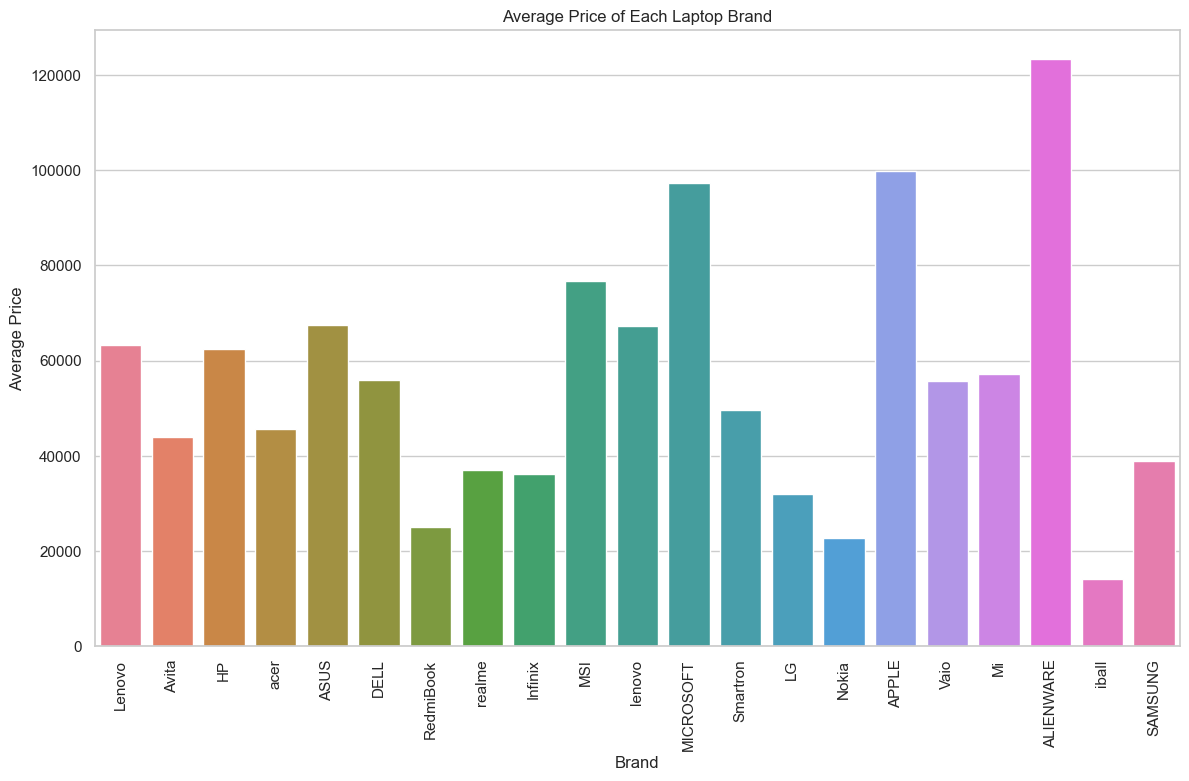

In [259]:
# average price by each brand
average_price = {}
for brand in laptops['brand'].unique():
    average_price[brand] = laptops[laptops['brand'] == brand]['latest_price'].mean()
    
# Create a DataFrame from the dictionary
average_price_df = pd.DataFrame(list(average_price.items()), columns=['brand', 'average_price'])

# Set a colorful palette
colors = sns.color_palette("husl", n_colors=len(average_price_df['brand']))

# Plotting the average star ratings for each brand
plt.figure(figsize=(14, 8))
sns.barplot(x='brand', y='average_price', data=average_price_df, palette=colors, hue='brand')
plt.title('Average Price of Each Laptop Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show();

In [260]:
laptops['Studying'] = 0
laptops['Programming'] = 0
laptops['Gaming'] = 0
laptops['Multimedia'] = 0

In [261]:
# replace "Missing" with 0
laptops['display_size'] = laptops['display_size'].replace('Missing', 0)


In [262]:
laptops['graphic_card_gb'].value_counts()

graphic_card_gb
0    631
4    138
2     69
6     40
8     18
Name: count, dtype: int64

In [263]:
# Intended Use
laptops['Studying'] = (
    (laptops['weight'].isin(['ThinNlight', 'Casual'])) &
    (laptops['processor_gnrtn'].isin(['10th', '11th', '7th', '8th', '9th'])) &
    (laptops['ram_gb']>=4) &
    ((laptops['display_size'].astype(float) >= 13) | (laptops['display_size'].astype(float) == 0))
)

laptops['Programming'] = (
    (laptops['processor_name'].isin(['Core i5', 'Core i7', 'Core i9', 'Ryzen 5', 'Ryzen 7', 'Ryzen 9'])) &
    (laptops['ram_gb']>=8) &
    (laptops['ssd']>=128) &
    (laptops['os'].isin(['Windows', 'Mac'])) &
    (laptops['os_bit'] == '64-bit')
)

# Gaming column
laptops['Gaming'] = (
    (laptops['processor_brand'].isin(['AMD', 'Intel'])) &
    (laptops['graphic_card_gb'] >= 4) &
    (laptops['ram_gb']>=8) &
    (laptops['ssd']>=256) &
    (laptops['os'].isin(['Windows'])) &
    (laptops['os_bit'] == '64-bit') &
    (laptops['weight'].isin(['Gaming']))
)

laptops['Multimedia'] = (
    (laptops['processor_brand'].isin(['AMD', 'Intel'])) &
    (laptops['ram_gb']>=4) &
    (laptops['ssd']>=256) &
    (laptops['os'].isin(['Windows', 'Mac'])) &
    (laptops['weight'].isin(['ThinNlight', 'Casual', 'Gaming']))
)


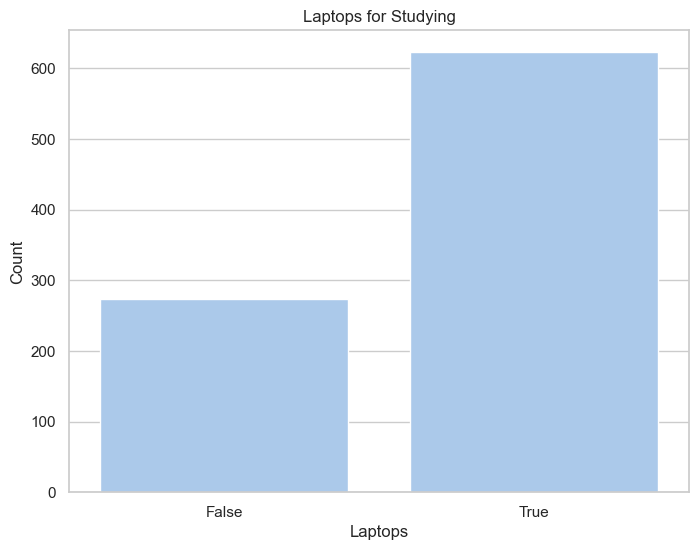

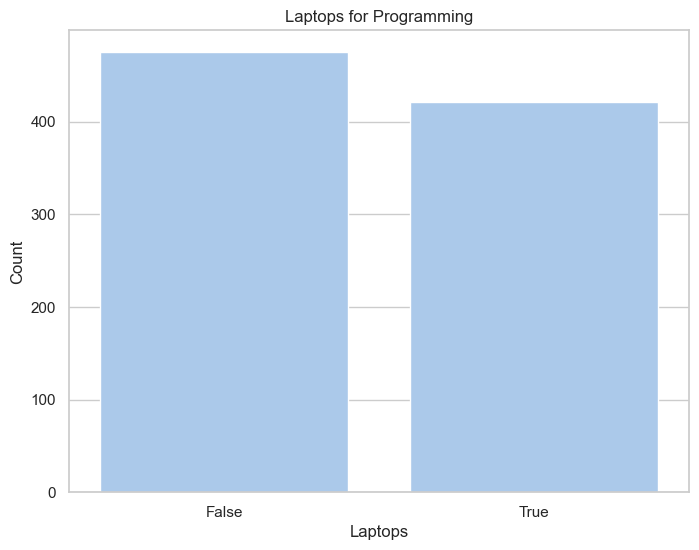

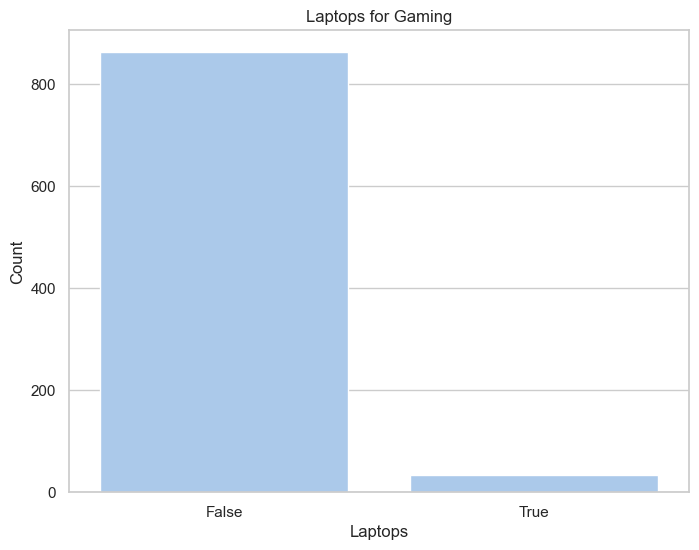

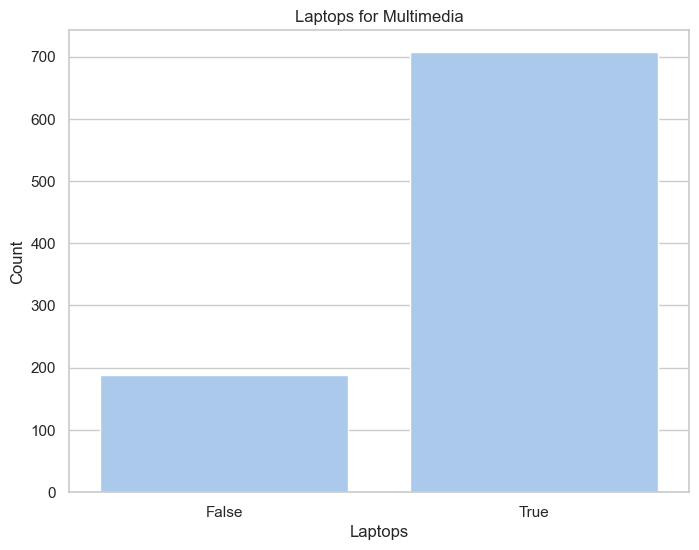

In [264]:
#  Customizing seaborn aesthetics
sns.set(style='whitegrid', palette='pastel')

# Defining the intended use categories
intended_uses = ["Studying", "Programming", "Gaming", "Multimedia"]

# Plotting graphs for each intended use
for use in intended_uses:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(data=laptops, x=use)
    plt.title(f'Laptops for {use}')
    plt.xlabel('Laptops')
    plt.ylabel('Count')
    plt.show()


In [265]:
laptops['Gaming'].value_counts()

Gaming
False    862
True      34
Name: count, dtype: int64

In [266]:
laptops['processor_gnrtn'].value_counts()

processor_gnrtn
11th       346
10th       246
Missing    239
8th         43
7th         12
9th          6
12th         3
4th          1
Name: count, dtype: int64

In [267]:
laptops["Medium"] = 0
laptops["Advanced"] = 0

laptops["Medium"] = (
    (laptops['processor_name'].isin(['Ryzen', 'Ryzen 5', 'Core', 'Core i5','Core i7', 'Core i9', 'Core m3'
 'Dual Core', 'Ever Screenpad', 'GeForce GTX' ,'GeForce RTX', 'GEFORCE RTX',
 'Hexa Core', 'M1', 'Genuine Windows', 'MediaTek Kompanio', 'Quad' ,'Ryzen 7', 'Ryzen 9'])) &
    (laptops['processor_gnrtn'].isin(['10th', '11th', '7th', '8th', '9th', '4th', '12th', 'Missing']))
)
laptops["Advanced"] = (
    (laptops['processor_name'].isin(['Core i7', 'Core i9', 'Ryzen 7', 'Ryzen 9', 'Core m3', 'M1'])) &
    (laptops['processor_gnrtn'].isin(['10th', '11th', '7th', '8th', '9th', '4th', '12th', 'Missing']))
)


In [268]:
laptops['graphic_card_gb'] = laptops['graphic_card_gb'].astype(int)
laptops['display_size'] = laptops['display_size'].astype(float)
laptops['warranty'] = laptops['warranty'].astype(int)
laptops['Touchscreen'] = laptops['Touchscreen'].replace('Yes', True)
laptops['Touchscreen'] = laptops['Touchscreen'].replace('No', False)

In [269]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               896 non-null    int64  
 1   brand            896 non-null    object 
 2   model            896 non-null    object 
 3   processor_brand  896 non-null    object 
 4   processor_name   896 non-null    object 
 5   processor_gnrtn  896 non-null    object 
 6   ram_gb           896 non-null    int64  
 7   ram_type         896 non-null    object 
 8   ssd              896 non-null    int64  
 9   hdd              896 non-null    int64  
 10  os               896 non-null    object 
 11  os_bit           896 non-null    object 
 12  graphic_card_gb  896 non-null    int32  
 13  weight           896 non-null    object 
 14  display_size     896 non-null    float64
 15  warranty         896 non-null    int32  
 16  Touchscreen      896 non-null    bool   
 17  msoffice        

In [270]:
"""
specifications = {
    "Intended Use": ["Studying", "Programming", "Gaming", "Multimedia"],
    "Preferred Brands or Models": [
        "ASUS",
        "HP",
        "Dell",
        "Lenovo",
        "Apple (MacBook Air/Pro)",
        "Not specific",
        "Any",
    ],
    "Processor Performance": [
        "Basic tasks (Intel Core i3 or equivalent AMD)",
        "Moderate multitasking (Intel Core i5 or equivalent AMD Ryzen 5)",
        "Intensive tasks (Intel Core i7/i9 or equivalent AMD Ryzen 7/9)",
    ],
    "Budget Range": ["Under 40k", "40k - 55k", "55k - 70k", "70k - 85k", "85k above"],
    "Operating System Preference": ["Windows", "macOS", "Linux"],
    "RAM Requirement": ["4GB - 8GB", "8GB - 16GB", "16GB+"],
    "Desired Storage Space": ["128GB - 256GB", "256GB - 512GB", "512GB - 1TB", "1TB+"],
    "Preferred Screen Size": ["11 - 13 inches", "14 - 15 inches", "15+ inches"],
    "Graphics-Intensive Tasks": [
        "Light gaming and multimedia consumption",
        "Moderate gaming and video editing",
        "Heavy gaming or professional video editing/rendering",
    ],
    "Display Panel Type": [
        "IPS for better color reproduction and viewing angles",
        "TN for faster response times (often found in gaming laptops)",
    ],
    "Display Resolution": [
        "HD (1366 x 768)",
        "Full HD (1920 x 1080)",
        "QHD (2560 x 1440) or higher",
    ],
    "Portability Importance": [
        "Very important (Looking for lightweight options)",
        "Moderate (Balanced weight and performance)",
        "Not a priority",
    ],
    "Battery Life Priority": [
        "Long battery life is a top priority",
        "Moderate battery life is sufficient",
        "Not a significant concern",
    ],
    "Touchscreen Preference": [
        "Yes, I prefer a touchscreen",
        "No, I don't need a touchscreen",
    ],
    "Necessary Ports and Connectivity": [
        "USB-C",
        "HDMI",
        "SD card slot",
        "Thunderbolt 3/4",
        "Other specific ports (please specify)",
    ],
    "Importance of Upgradability": [
        "I prefer a laptop with upgradable components",
        "Upgradability is not a priority for me",
    ],
    "Keyboard Type": ["Standard keyboard", "Backlit keyboard", "Mechanical keyboard"],
    "Fingerprint Reader/Security Features": [
        "Fingerprint reader for security",
        "No specific need for biometric authentication",
    ],
    "Warranty and Support": [
        "Longer warranty and premium support services",
        "Standard warranty is sufficient",
    ],
}
"""
def filterLaptops(specification, laptops):
    filterLaptops = laptops.copy()
    filterLaptops = filterLaptops[filterLaptops[specification["Intended Use"]] == True]
    if specification["Preferred Brands or Models"] != "Any":
        filterLaptops = filterLaptops[filterLaptops["brand"].isin(specification["Preferred Brands or Models"])]
        
    
    if specification["Processor Performance"] == "Moderate multitasking (Intel Core i5 or equivalent AMD Ryzen 5)":
        filterLaptops = filterLaptops[filterLaptops["Medium"] == True]
    elif specification["Processor Performance"] == "Intensive tasks (Intel Core i7/i9 or equivalent AMD Ryzen 7/9)":
        filterLaptops = filterLaptops[filterLaptops["Advanced"] == True]
        
        
    if specification["Budget Range"] == "Under 40k":
        filterLaptops = filterLaptops[filterLaptops["latest_price"] < 40000]
    elif specification["Budget Range"] == "40k - 55k":
        filterLaptops = filterLaptops[(filterLaptops["latest_price"] >= 40000) & (filterLaptops["latest_price"] < 55000)]
    elif specification["Budget Range"] == "55k - 70k":
        filterLaptops = filterLaptops[(filterLaptops["latest_price"] >= 55000) & (filterLaptops["latest_price"] < 70000)]
    elif specification["Budget Range"] == "70k - 85k":
        filterLaptops = filterLaptops[(filterLaptops["latest_price"] >= 70000) & (filterLaptops["latest_price"] < 85000)]
    elif specification["Budget Range"] == "85k above":
        filterLaptops = filterLaptops[filterLaptops["latest_price"] >= 85000]
    elif specification["Budget Range"] == "Any":
        pass
      
    if specification["Operating System Preference"] != "Any":
        filterLaptops = filterLaptops[filterLaptops["os"].isin(specification["Operating System Preference"])]
    
    if specification["RAM Requirement"] == "4GB - 8GB":
        filterLaptops = filterLaptops[filterLaptops["ram_gb"] >= 4 | filterLaptops["ram_gb"] <= "8 GB GB"]
    elif specification["RAM Requirement"] == "8GB - 16GB":
        filterLaptops = filterLaptops[(filterLaptops["ram_gb"] >= 8) & (filterLaptops["ram_gb"] <= 16)]
    elif specification["RAM Requirement"] == "16GB+":
        filterLaptops = filterLaptops[filterLaptops["ram_gb"] >= 16]
        
    if specification["Desired Storage Space"] == "128GB - 256GB":
        filterLaptops = filterLaptops[(filterLaptops["ssd"] + filterLaptops["hdd"] >= 128) & (filterLaptops["ssd"] + filterLaptops["hdd"] <= 256)]
    elif specification["Desired Storage Space"] == "256GB - 512GB":
        filterLaptops = filterLaptops[(filterLaptops["ssd"] + filterLaptops["hdd"] >= 256) & (filterLaptops["ssd"] + filterLaptops["hdd"] <= 512)]
    elif specification["Desired Storage Space"] == "512GB - 1TB":
        filterLaptops = filterLaptops[(filterLaptops["ssd"] + filterLaptops["hdd"] >= 512) & (filterLaptops["ssd"] + filterLaptops["hdd"] <= 1024)]
    elif specification["Desired Storage Space"] == "1TB+":
        filterLaptops = filterLaptops[filterLaptops["ssd"] + filterLaptops["hdd"] >= 1024]
        
    if specification["Preferred Screen Size"] == "11 - 13 inches":
        filterLaptops = filterLaptops[(filterLaptops["display_size"] >= 11) & (filterLaptops["display_size"] <= 13)]
    elif specification["Preferred Screen Size"] == "14 - 15 inches":
        filterLaptops = filterLaptops[(filterLaptops["display_size"] >= 14) & (filterLaptops["display_size"] <= 15)]
    elif specification["Preferred Screen Size"] == "15+ inches":
        filterLaptops = filterLaptops[filterLaptops["display_size"] >= 15]
        
    if specification["Graphics-Intensive Tasks"] == "Light gaming and multimedia consumption":
        filterLaptops = filterLaptops[filterLaptops["Multimedia"] == True]
    elif specification["Graphics-Intensive Tasks"] == "Moderate gaming and video editing":
        filterLaptops = filterLaptops[filterLaptops["Gaming"] == True]
    elif specification["Graphics-Intensive Tasks"] == "Heavy gaming or professional video editing/rendering":
        filterLaptops = filterLaptops[filterLaptops["Gaming"] == True]
        
    # portability
    if specification['Portability Importance'] == "Very important (Looking for lightweight options)":
        filterLaptops = filterLaptops[filterLaptops["weight"] == "ThinNlight"]
    elif specification['Portability Importance'] == "Moderate (Balanced weight and performance)":
        filterLaptops = filterLaptops[filterLaptops["weight"] == "Casual" | filterLaptops["weight"] == "ThinNlight" ]

    if specification["Touchscreen Preference"] == "Yes, I prefer a touchscreen":
        filterLaptops = filterLaptops[filterLaptops["Touchscreen"] == True]
    elif specification["Touchscreen Preference"] == "No, I don't need a touchscreen":
        filterLaptops = filterLaptops[filterLaptops["Touchscreen"] == False]
        
    if specification["Warranty and Support"] == "Longer warranty and premium support services":
        filterLaptops = filterLaptops[filterLaptops["warranty"] >= 2]
    
    
    # sort by ratings
    filterLaptops = filterLaptops.sort_values(by=["star_rating", "ratings", "reviews"], ascending=False)
    return filterLaptops
    
    
    
        

In [271]:
specification = {
    "Intended Use": "Studying",
    "Preferred Brands or Models": "Any",
    "Processor Performance": "Moderate multitasking (Intel Core i5 or equivalent AMD Ryzen 5)",
    "Budget Range": "Any",
    "Operating System Preference": "Any",
    "RAM Requirement": "Any",
    "Desired Storage Space": "Any",
    "Preferred Screen Size": "Any",
    "Graphics-Intensive Tasks": "Light gaming and multimedia consumption",
    "Portability Importance": "Any",
    "Touchscreen Preference": "Yes, I prefer a touchscreen",
    "Warranty and Support": "Any",
}

filteredLaptops = filterLaptops(specification, laptops)
filteredLaptops.head()

,id,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews,link,storage,Studying,Programming,Gaming,Multimedia,Medium,Advanced,image_url,title
285,285,HP,Spectre,Intel,Core i5,11th,8,LPDDR4X,512,0,Windows,64-bit,0,Casual,13.3,0,True,No,95940,114749,14,5.0,3,1,https://www.flipkart.com/hp-spectre-intel-core...,512,True,True,False,True,True,False,https://rukminim2.flixcart.com/image/416/416/x...,Not Available
398,398,HP,Spectre,Intel,Core i5,10th,8,DDR4,512,0,Windows,64-bit,0,Casual,0.0,1,True,No,52490,152042,17,5.0,2,1,https://www.flipkart.com/hp-2023-intel-core-i5...,512,True,True,False,True,True,False,https://rukminim2.flixcart.com/image/416/416/x...,Not Available
376,376,ASUS,ZenBook,Intel,Core i5,11th,8,LPDDR4X,512,0,Windows,64-bit,0,Casual,0.0,1,True,No,99990,122990,18,4.9,35,6,Not Found,512,True,True,False,True,True,False,Not Available,Not Available
602,602,ASUS,ZenBook,Intel,Core i7,11th,16,LPDDR4X,1024,0,Windows,64-bit,0,Casual,16.0,1,True,No,102990,158990,24,4.8,8,1,https://www.flipkart.com/asus-zenbook-14-oled-...,1024,True,True,False,True,True,True,https://rukminim2.flixcart.com/image/416/416/x...,Not Available
633,633,ASUS,Missing,Intel,Core i9,10th,16,DDR4,1024,0,Windows,64-bit,6,Casual,0.0,1,True,No,269990,326990,17,4.8,8,1,Not Found,1024,True,True,False,True,True,True,Not Available,Not Available


In [272]:
# show all columns
pd.set_option("display.max_columns", None)
laptops.head()

,id,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews,link,storage,Studying,Programming,Gaming,Multimedia,Medium,Advanced,image_url,title
0,0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4,DDR4,0,1024,Windows,64-bit,0,ThinNlight,0.0,0,False,No,20554,32790,23,3.7,63,12,https://www.flipkart.com/lenovo-e41-amd-apu-du...,1024,True,False,False,False,False,False,https://rukminim2.flixcart.com/image/416/416/k...,Not Available
1,1,Lenovo,Ideapad,AMD,APU Dual,10th,4,DDR4,0,512,Windows,64-bit,0,Casual,0.0,0,False,No,34990,21325,8,3.6,1894,256,https://www.flipkart.com/lenovo-ideapad-1-amd-...,512,True,False,False,False,False,False,https://rukminim2.flixcart.com/image/416/416/l...,Not Available
2,2,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,64-bit,0,ThinNlight,0.0,0,False,No,21990,27990,28,3.7,1153,159,https://www.flipkart.com/chuwi-intel-celeron-q...,128,True,False,False,False,False,False,https://rukminim2.flixcart.com/image/416/416/x...,Not Available
3,3,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,64-bit,0,ThinNlight,0.0,0,False,No,21990,27990,23,3.7,1153,159,https://www.flipkart.com/chuwi-intel-celeron-q...,128,True,False,False,False,False,False,https://rukminim2.flixcart.com/image/416/416/x...,Not Available
4,4,Avita,PURA,AMD,APU Dual,10th,4,DDR4,256,0,Windows,64-bit,0,ThinNlight,0.0,0,False,No,21990,33490,25,3.7,1657,234,https://www.flipkart.com/chuwi-intel-celeron-q...,256,True,False,False,True,False,False,https://rukminim2.flixcart.com/image/416/416/x...,Not Available


In [273]:
def get_image_and_price(link):
    try:
        response = requests.get(link)
        soup = BeautifulSoup(response.content, "html.parser")
        element = soup.find("div", class_="_2c7YLP")
        image_src = element.find("img", class_="_396cs4").get("src")
        price = element.find("div", class_="_30jeq3").text
        product = {
            "image_src": image_src,
            "price": price
        }
        return product
    except:
        return None

In [274]:
# laptops['image_url'] = "Not Available"
# laptops['title'] = "Not Available"

In [275]:
# convert ₹29,999 to 29999 only if present
def cleanPrice(price):
    if price != "Not Available":
        return int(price[1:].replace(',', ''))
    else:
        return price
    
print(cleanPrice("29999"))

9999


In [276]:
laptops['link'][50]

'https://www.flipkart.com/asus-vivobook-intel-core-i3-12th-gen-1215u-8-gb-512-gb-ssd-windows-11-home-x1504za-nj325ws-laptop/p/itm7480082770d25?pid=COMGSYYP2HCRAPCS&lid=LSTCOMGSYYP2HCRAPCSFPIJGB&marketplace=FLIPKART&q=ASUS+VivoBook+Intel+Core+i3+11th+DDR4&store=6bo%2Fb5g&srno=s_1_1&otracker=search&fm=organic&iid=7252b410-087e-44f8-81c6-4cbf0972b435.COMGSYYP2HCRAPCS.SEARCH&ppt=None&ppn=None&ssid=02kwxer8tc0000001704463786987&qH=c7cbf7cc3db19bef'

In [277]:
get_image_and_price(laptops['link'][50])

{'image_src': 'https://rukminim2.flixcart.com/image/416/416/xif0q/computer/c/v/k/x1504za-nj325ws-thin-and-light-laptop-asus-original-imagsyypnweh7zzy.jpeg?q=70',
 'price': '₹36,990'}

In [278]:
# for i in tqdm(range(len(laptops))):
#     if laptops['link'][i] == "Not Found" or laptops['image_url'][i] != "Not Available":
#         continue
#     productInfo = get_image_and_price(laptops['link'][i])
#     if productInfo:
#         laptops.loc[i, 'image_url'] = productInfo['image_src']
#         laptops.loc[i, 'latest_price'] = cleanPrice(productInfo['price'])


In [279]:
# notFound = 0
# found = 0
# for i in range(len(laptops)):
#     if laptops['image_url'][i] == 'Not Available':
#         notFound += 1
#     else:
#         found += 1
# print(f"Found: {found}, Not Found: {notFound}")

In [280]:
# laptops.drop(['title'], axis=1, inplace=True)

In [281]:
# # save the cleaned data
laptops.to_csv('cleaned_laptops_updated.csv', index=False)

In [282]:
# display all columns
pd.set_option("display.max_columns", None)
laptops.head()

,id,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews,link,storage,Studying,Programming,Gaming,Multimedia,Medium,Advanced,image_url,title
0,0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4,DDR4,0,1024,Windows,64-bit,0,ThinNlight,0.0,0,False,No,20554,32790,23,3.7,63,12,https://www.flipkart.com/lenovo-e41-amd-apu-du...,1024,True,False,False,False,False,False,https://rukminim2.flixcart.com/image/416/416/k...,Not Available
1,1,Lenovo,Ideapad,AMD,APU Dual,10th,4,DDR4,0,512,Windows,64-bit,0,Casual,0.0,0,False,No,34990,21325,8,3.6,1894,256,https://www.flipkart.com/lenovo-ideapad-1-amd-...,512,True,False,False,False,False,False,https://rukminim2.flixcart.com/image/416/416/l...,Not Available
2,2,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,64-bit,0,ThinNlight,0.0,0,False,No,21990,27990,28,3.7,1153,159,https://www.flipkart.com/chuwi-intel-celeron-q...,128,True,False,False,False,False,False,https://rukminim2.flixcart.com/image/416/416/x...,Not Available
3,3,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,64-bit,0,ThinNlight,0.0,0,False,No,21990,27990,23,3.7,1153,159,https://www.flipkart.com/chuwi-intel-celeron-q...,128,True,False,False,False,False,False,https://rukminim2.flixcart.com/image/416/416/x...,Not Available
4,4,Avita,PURA,AMD,APU Dual,10th,4,DDR4,256,0,Windows,64-bit,0,ThinNlight,0.0,0,False,No,21990,33490,25,3.7,1657,234,https://www.flipkart.com/chuwi-intel-celeron-q...,256,True,False,False,True,False,False,https://rukminim2.flixcart.com/image/416/416/x...,Not Available
